In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
torch.manual_seed(1)

In [2]:
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self):
            self.x=torch.zeros(20,2)
            self.x[:,0]=torch.arange(-1,1,0.1)
            self.x[:,1]=torch.arange(-1,1,0.1)
            self.w=torch.tensor([ [1.0,-1.0],[1.0,3.0]])
            self.b=torch.tensor([[1.0,-1.0]])
            self.f=torch.mm(self.x,self.w)+self.b
            self.y=self.f+0.001*torch.randn((self.x.shape[0],1))
            self.len=self.x.shape[0]
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len

In [3]:
dataset = Data()

In [4]:
class linear_regression(nn.Module):
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        y_hat = self.linear(x)
        return y_hat

In [5]:
model = linear_regression(2, 2)

In [6]:
optimizer = optim.SGD(model.parameters(), lr = 0.1)
criterion = nn.MSELoss()
train_loader = DataLoader(dataset = dataset, batch_size = 5)

In [11]:
losses = []
epochs = 20
for epoch in range(epochs):
    for x, y in train_loader:
        y_hat = model(x)
        loss = criterion(y_hat, y)
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step

In [12]:
torch.__version__

'1.3.1'

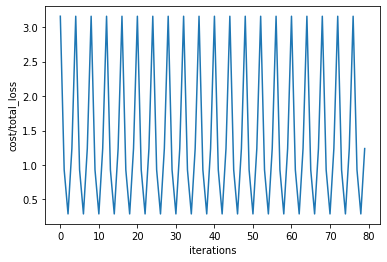

In [13]:
plt.plot(losses)
plt.xlabel('iterations')
plt.ylabel('cost/total_loss')
plt.show()